In [22]:
from fastai.text.all import *
path = untar_data(URLs.IMDB)

In [23]:
files = get_text_files(path, folders = ['train', 'test','unsup'])


In [24]:
txt = files[0].open().read(); txt[:75]

'Once again Mr. Costner has dragged out a movie for far longer than necessar'

In [25]:
spacy = WordTokenizer()
toks = first(spacy([txt]))
print(coll_repr(toks, 30))

(#187) ['Once','again','Mr.','Costner','has','dragged','out','a','movie','for','far','longer','than','necessary','.','Aside','from','the','terrific','sea','rescue','sequences',',','of','which','there','are','very','few','I'...]


In [26]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')

In [27]:

cred = '{"username":"khushitulsiyan","key":"8eade916e17b8ba9fbdc153fb1e3bb13"}'



In [28]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(cred)
    cred_path.chmod(0o600)

In [29]:
path = Path('us-patent-phrase-to-phrase-matching')


In [30]:
if not iskaggle and not path.exists():
    import zipfile, kaggle
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

In [31]:
if iskaggle:
    path = Path('../input/us-patent-phrase-to-phrase-matching')
    ! pip install -q datasets

In [32]:
!ls {path}

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
import pandas as pd

In [34]:
df = pd.read_csv(path/'train.csv')
df

,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00
...,...,...,...,...,...
36468,8e1386cbefd7f245,wood article,wooden article,B44,1.00
36469,42d9e032d1cd3242,wood article,wooden box,B44,0.50
36470,208654ccb9e14fa3,wood article,wooden handle,B44,0.50
36471,756ec035e694722b,wood article,wooden material,B44,0.75


In [35]:
df.describe(include = 'object')

,id,anchor,target,context
count,36473,36473,36473,36473
unique,36473,733,29340,106
top,37d61fd2272659b1,component composite coating,composition,H01
freq,1,152,24,2186


In [36]:
df['input'] = 'TEXT1:' + df.context + ';TEXT2:' + df.target + ';ANC1:' + df.anchor

In [37]:
df.input.head()


0    TEXT1:A47;TEXT2:abatement of pollution;ANC1:abatement
1            TEXT1:A47;TEXT2:act of abating;ANC1:abatement
2           TEXT1:A47;TEXT2:active catalyst;ANC1:abatement
3       TEXT1:A47;TEXT2:eliminating process;ANC1:abatement
4             TEXT1:A47;TEXT2:forest region;ANC1:abatement
Name: input, dtype: object

In [38]:
from datasets import Dataset, DatasetDict

ds = Dataset.from_pandas(df)
ds

Dataset({
    features: ['id', 'anchor', 'target', 'context', 'score', 'input'],
    num_rows: 36473
})

In [39]:
model_nm = 'microsoft/deberta-v3-small'

In [40]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
tokz = AutoTokenizer.from_pretrained(model_nm)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

c:\Users\INDIA\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\INDIA\.cache\huggingface\hub\models--microsoft--deberta-v3-small. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

c:\Users\INDIA\anaconda3\Lib\site-packages\transformers\convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [41]:
tokz.tokenize("Hi, I'm Khushi Tulsiyan. Currently learning NLP from fast.ai")

['▁Hi',
 ',',
 '▁I',
 "'",
 'm',
 '▁Khu',
 'shi',
 '▁Tulsi',
 'yan',
 '.',
 '▁Currently',
 '▁learning',
 '▁NLP',
 '▁from',
 '▁fast',
 '.',
 'ai']

In [42]:
def tok_func(x) : return tokz(x["input"])

In [43]:
tok_ds = ds.map(tok_func, batched=True)

Map:   0%|          | 0/36473 [00:00<?, ? examples/s]

In [44]:
row = tok_ds[0]
row['input'], row['input_ids']

('TEXT1:A47;TEXT2:abatement of pollution;ANC1:abatement',
 [1,
  54453,
  435,
  294,
  558,
  5753,
  346,
  104917,
  445,
  294,
  16191,
  297,
  17019,
  265,
  6435,
  346,
  64097,
  435,
  294,
  16191,
  297,
  17019,
  2])

In [50]:
tokz.vocab_size

128000

In [52]:
tok_ds = tok_ds.rename_columns({'score':'labels'})

In [54]:
eval_df = pd.read_csv(path/'test.csv')
eval_df.describe()


,id,anchor,target,context
count,36,36,36,36
unique,36,34,36,29
top,4112d61851461f60,el display,inorganic photoconductor drum,G02
freq,1,2,1,3


In [56]:
dds = tok_ds.train_test_split(0.25, seed = 42)
dds

DatasetDict({
    train: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 27354
    })
    test: Dataset({
        features: ['id', 'anchor', 'target', 'context', 'labels', 'input', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 9119
    })
})

In [59]:
eval_df['input'] = 'TEXT1:' + eval_df.context + ';TEXT2:' + eval_df.target + ';ANC1:' + eval_df.anchor
eval_ds = Dataset.from_pandas(eval_df).map(tok_func, batched=True)

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

In [60]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
housing = housing['data'].join(housing['target']).sample(1000, random_state=42)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000


In [61]:
np.set_printoptions(precision=2, suppress=True)
np.corrcoef(housing, rowvar = False)

array([[ 1.  , -0.1 ,  0.51, -0.07, -0.  , -0.02, -0.1 ,  0.  ,  0.69],
       [-0.1 ,  1.  , -0.18, -0.11, -0.33,  0.03,  0.03, -0.13,  0.1 ],
       [ 0.51, -0.18,  1.  ,  0.67, -0.06, -0.01,  0.13, -0.05,  0.26],
       [-0.07, -0.11,  0.67,  1.  , -0.04, -0.08,  0.1 , -0.  , -0.04],
       [-0.  , -0.33, -0.06, -0.04,  1.  ,  0.15, -0.11,  0.11, -0.03],
       [-0.02,  0.03, -0.01, -0.08,  0.15,  1.  , -0.17,  0.19, -0.26],
       [-0.1 ,  0.03,  0.13,  0.1 , -0.11, -0.17,  1.  , -0.92, -0.14],
       [ 0.  , -0.13, -0.05, -0.  ,  0.11,  0.19, -0.92,  1.  , -0.06],
       [ 0.69,  0.1 ,  0.26, -0.04, -0.03, -0.26, -0.14, -0.06,  1.  ]])

In [63]:
np.corrcoef(housing.MedInc, housing.MedHouseVal)

array([[1.  , 0.69],
       [0.69, 1.  ]])

In [64]:
def corr(x,y) : return np.corrcoef(x,y)[0,1]
corr(housing.MedInc, housing.MedHouseVal)

0.6887874432146511

In [65]:
def show_corr(df, a, b):
    x,y = df[a], df[b]
    plt.scatter(x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b} ; r: {corr(x,y):.2f}')

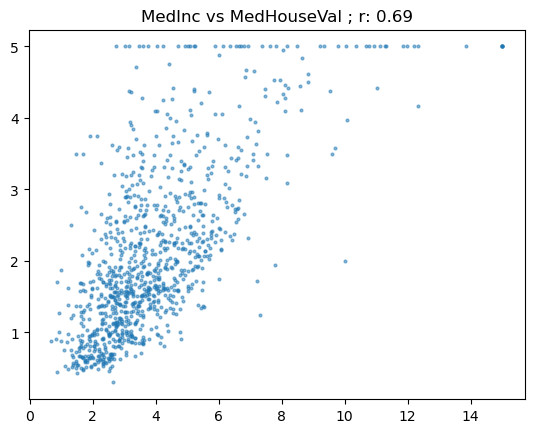

In [66]:
show_corr(housing, 'MedInc', 'MedHouseVal')

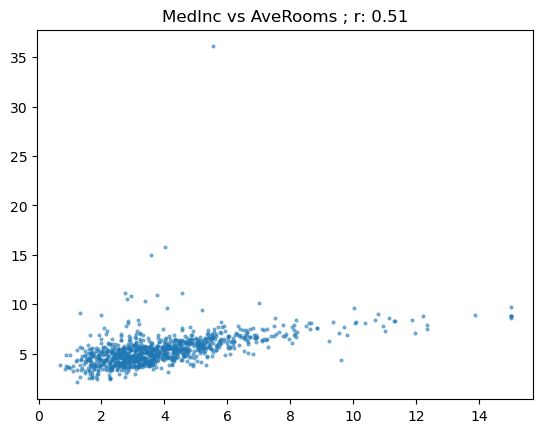

In [67]:
show_corr(housing, 'MedInc', 'AveRooms')

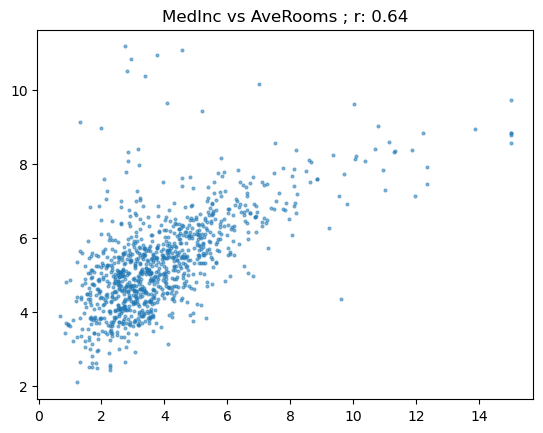

In [68]:
subset = housing[housing.AveRooms < 15]
show_corr(subset, 'MedInc', 'AveRooms')

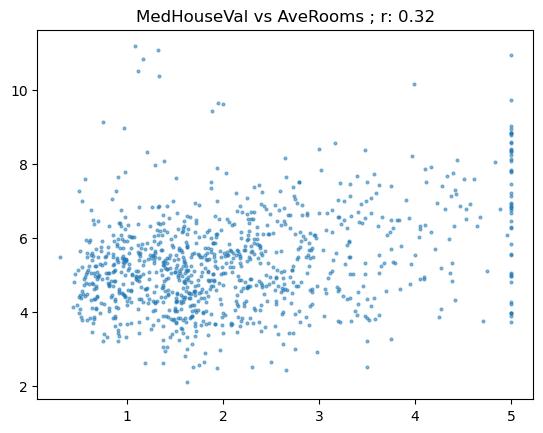

In [69]:
show_corr(subset, 'MedHouseVal', 'AveRooms')

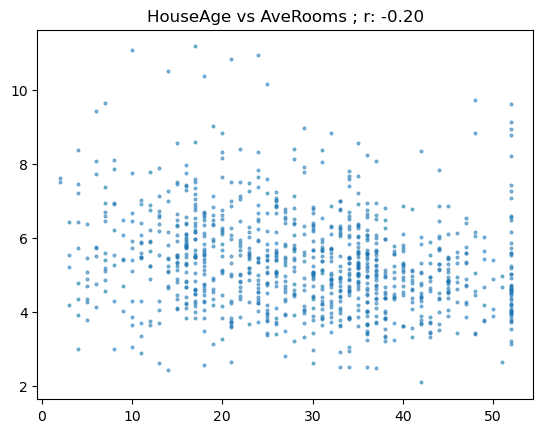

In [70]:
show_corr(subset, 'HouseAge', 'AveRooms')

In [71]:
def corr_d(eval_pred) : return {'pearson': corr(*eval_pred)}

In [72]:
from transformers import TrainingArguments,Trainer

In [75]:
bs = 128
epochs = 4
lr = 8e-5

In [79]:
args = TrainingArguments('outputs', learning_rate=lr, warmup_ratio=0.1, lr_scheduler_type='cosine', fp16=True,
    evaluation_strategy="epoch", per_device_train_batch_size=bs, per_device_eval_batch_size=bs*2,
    num_train_epochs=epochs, weight_decay=0.01, report_to='none')

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>={ACCELERATE_MIN_VERSION}'`